In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import *

weather = pd.read_csv('ny_hourly.csv',
                     parse_dates=[['date','TimeEST']],# use to combine date and TimeEST
                     usecols=['date','TimeEST','TemperatureF','Dew PointF','Humidity']) #filter the cols needed

weather.describe() # there are some numbers don't make sense

,TemperatureF,Dew PointF,Humidity
count,5141.000000,5141.000000,5137.000000
mean,42.943649,27.130247,58.341250
std,280.702231,280.354764,20.746395
min,-9999.000000,-9999.000000,9.000000
25%,37.900000,23.000000,42.000000
50%,50.000000,35.100000,55.000000
75%,63.000000,48.000000,78.000000
max,90.000000,69.800000,100.000000


In [2]:
# filter the meaningful data only
weather = weather[weather['TemperatureF'] > - 100]
# sorting date by date-Timeest
weather = weather.sort_values('date_TimeEST')
weather

,date_TimeEST,TemperatureF,Dew PointF,Humidity
0,2016-01-01 00:51:00,42.1,25.0,51.0
1,2016-01-01 01:51:00,41.0,25.0,53.0
2,2016-01-01 02:51:00,41.0,26.1,55.0
3,2016-01-01 03:51:00,41.0,26.1,55.0
4,2016-01-01 04:51:00,39.9,26.1,58.0
...,...,...,...,...
5116,2016-06-30 23:51:00,73.0,57.0,57.0
5137,2016-07-01 20:51:00,77.0,61.0,58.0
5138,2016-07-01 21:51:00,75.9,61.0,60.0
5139,2016-07-01 22:51:00,75.9,61.0,60.0


Text(0.5, 1.0, 'Hourly Weather in New York')

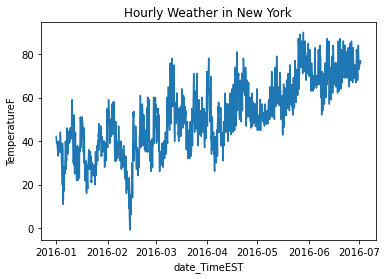

In [3]:
# Create a lineplot for TemperatureF
sns.lineplot(x='date_TimeEST', y = 'TemperatureF', data=weather).set_title('Hourly Weather in New York')

Text(0.5, 1.0, 'Hourly Weather in New York')

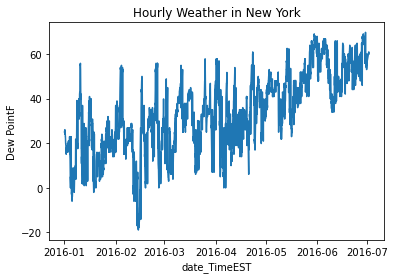

In [4]:
# Create a lineplot for Dew PointF
sns.lineplot(x='date_TimeEST', y = 'Dew PointF', data=weather).set_title('Hourly Weather in New York')

Text(0.5, 1.0, 'Hourly Weather in New York')

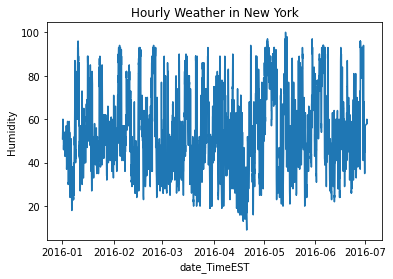

In [5]:
# Create a lineplot for Humidity
sns.lineplot(x='date_TimeEST', y = 'Humidity', data=weather).set_title('Hourly Weather in New York')

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_71034/559836839.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45)


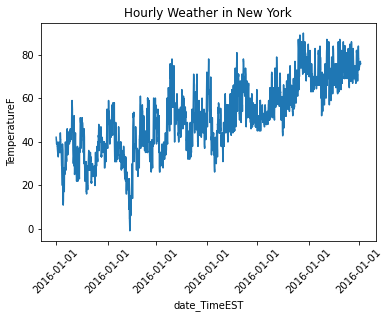

In [6]:
fig, ax = plt.subplots()
sns.lineplot(x='date_TimeEST', y = 'TemperatureF', data=weather).set_title('Hourly Weather in New York')
x_labels = weather['date_TimeEST'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(x_labels, rotation=45)
plt.show()

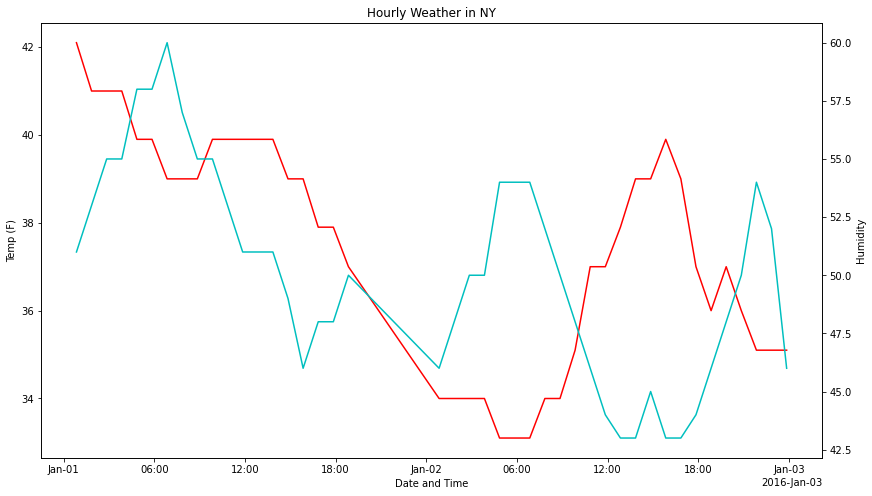

In [7]:
# Plotting "two variables".

january = weather[weather['date_TimeEST'] < np.datetime64('2016-01-03')]
fig, temp_ax = plt.subplots()
fig.set_size_inches(14, 8)
humid_ax = temp_ax.twinx()

# Add labels.
temp_ax.set_title('Hourly Weather in NY')
temp_ax.set_xlabel('Date and Time')
temp_ax.set_ylabel('Temp (F)')
humid_ax.set_ylabel('Humidity')

# Change date and time.
major_locator = AutoDateLocator()
formatter = ConciseDateFormatter(major_locator)
temp_ax.xaxis.set_major_formatter(formatter)
humid_ax.xaxis.set_major_formatter(formatter)

temp_lines = temp_ax.plot(january['date_TimeEST'],january['TemperatureF'],'r')
humid_lines = humid_ax.plot(january['date_TimeEST'],january['Humidity'],'c')


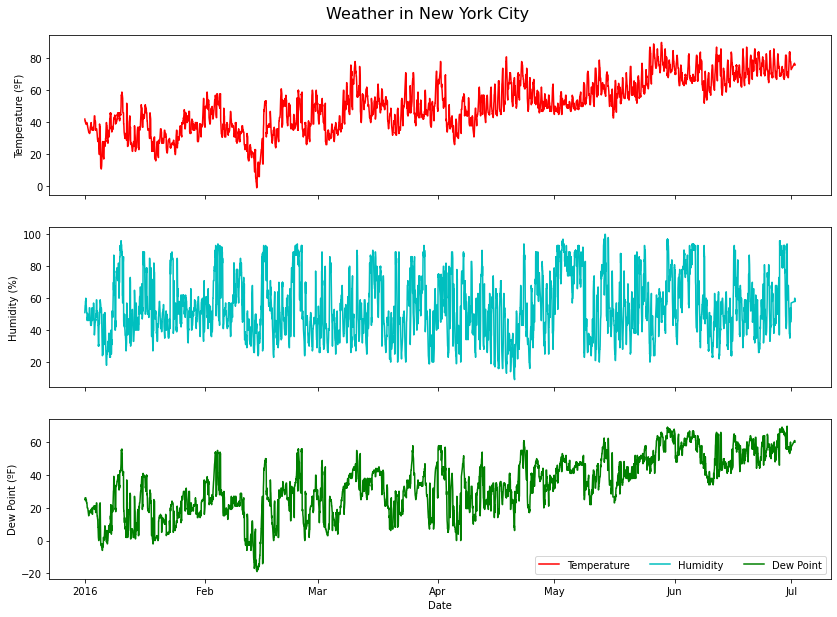

In [9]:
# Plot "multiple variables" with the same x-axis.
fig, axes = plt.subplots(nrows=3)
nyc_fig = fig
fig.set_size_inches(14, 10)

temp_lines = axes[0].plot(weather.date_TimeEST, weather.TemperatureF, 'r')
humidity_lines = axes[1].plot(weather.date_TimeEST, weather.Humidity, 'c')
dew_point_lines = axes[2].plot(weather.date_TimeEST, weather['Dew PointF'], 'g')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

major_locator = AutoDateLocator()
formatter = ConciseDateFormatter(major_locator)
axes[2].xaxis.set_major_formatter(formatter)

fig.suptitle("Weather in New York City", fontsize=16, y=0.92)

axes[0].set_ylabel("Temperature (ºF)")
axes[1].set_ylabel("Humidity (%)")
axes[2].set_ylabel("Dew Point (ºF)")
axes[2].set_xlabel("Date")

axes[2].legend(temp_lines + humidity_lines + dew_point_lines, 
                ['Temperature', 'Humidity', 'Dew Point'], loc='lower right', ncol=3)

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

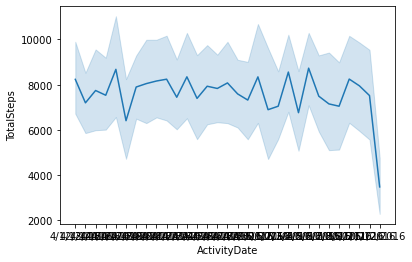

In [10]:
# LinePlots

fitness = pd.read_csv('daily_activity.csv')

# Create a simple lineplot.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=fitness)

In [11]:
# Create a time-series.
steps_time_series = fitness\
 .groupby('ActivityDate')[['TotalSteps']]\
 .sum()\
 .reset_index()\
 .copy()

steps_time_series.head()

,ActivityDate,TotalSteps
0,4/12/2016,271816
1,4/13/2016,237558
2,4/14/2016,255538
3,4/15/2016,248617
4,4/16/2016,277733


  ActivityDate  TotalSteps
0   2016-04-12      271816
1   2016-04-13      237558
2   2016-04-14      255538
3   2016-04-15      248617
4   2016-04-16      277733


<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

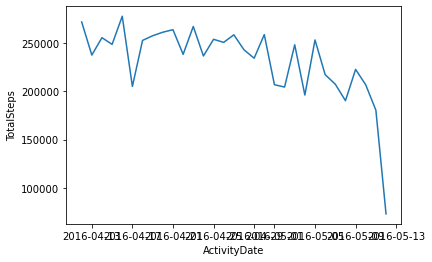

In [44]:
# Format data with datetime() function.
steps_time_series['ActivityDate'] = pd.to_datetime(steps_time_series['ActivityDate'])
print(steps_time_series.head())

# Create a lineplot without confidence level shade.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=steps_time_series)

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

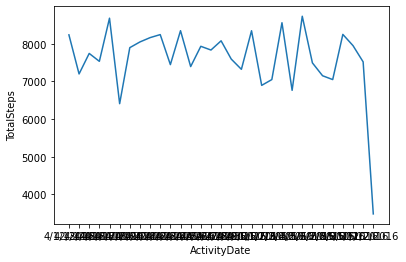

In [45]:
# Create a simple lineplot without confidence interval.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=fitness, ci=None)

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

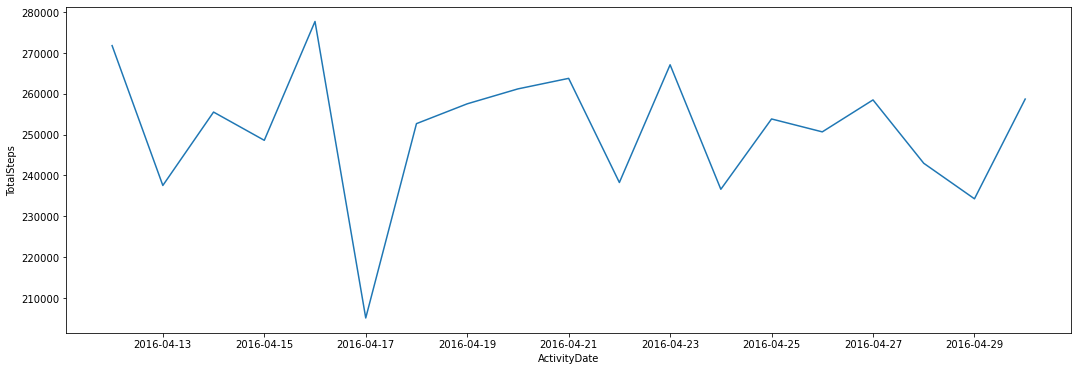

In [46]:
# Lineplots: Improve quality

# Create plot size.
plt.figure(figsize=(18, 6))

# Create a lineplote with specific date.
sns.lineplot(x='ActivityDate', y='TotalSteps',
             data=steps_time_series[steps_time_series['ActivityDate'] < '2016-05-01'])

In [47]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

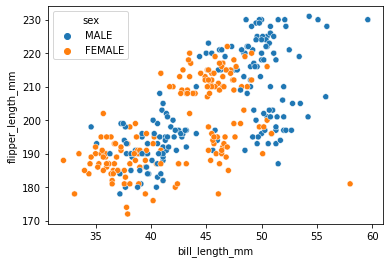

In [48]:
# Create a scatterplot.
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='sex', data=penguins)

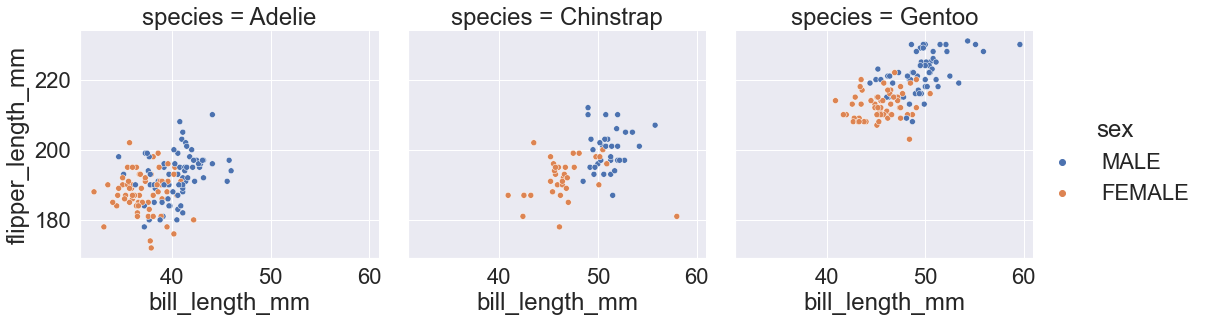

In [49]:
# Set the size of the plot.
sns.set(font_scale = 2)

# Create a relational plot.
sns.relplot(x='bill_length_mm', y='flipper_length_mm', hue='sex',
            data=penguins, col='species')

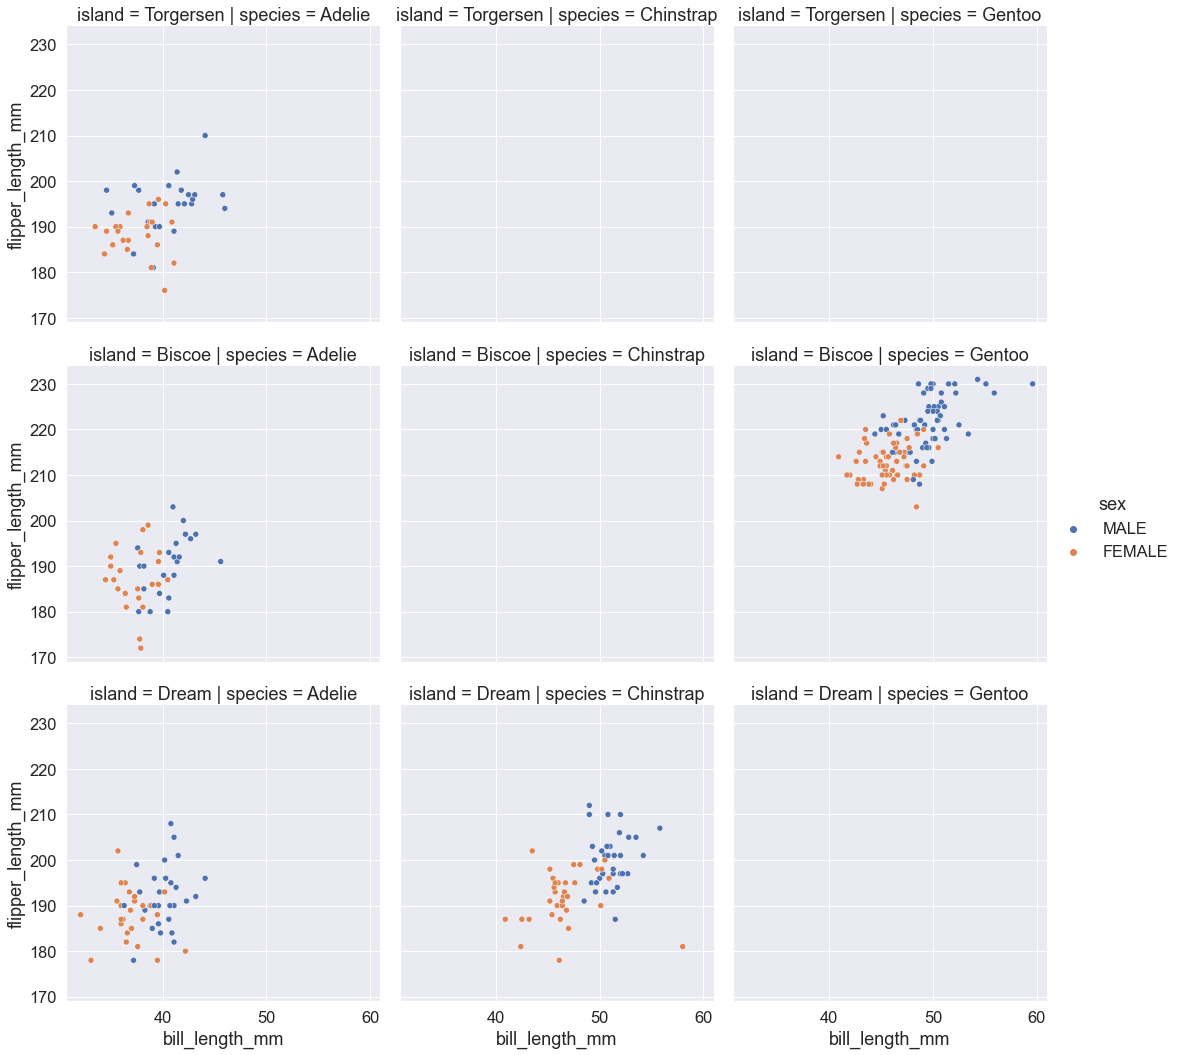

In [50]:
# Set the size of the plot.
sns.set(font_scale = 1.5)

# Create a relational plot.
sns.relplot(x='bill_length_mm', y='flipper_length_mm',
            hue='sex', data=penguins, col='species', row='island')